In [1]:
import tensorflow as tf
import numpy as np

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Filter the training and test sets to contain only class 3 and class 7
x_train = x_train[(y_train == 3) | (y_train == 7)]
y_train = y_train[(y_train == 3) | (y_train == 7)]
x_test = x_test[(y_test == 3) | (y_test == 7)]
y_test = y_test[(y_test == 3) | (y_test == 7)]
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
# Convert the labels to a binary classification problem (class 7 is 0, class 3 is 1)
y_train = (y_train == 3).astype(int)
y_test = (y_test == 3).astype(int)
y_train_vect = np.asarray(y_train).astype('float32').reshape((-1,1))
y_test_vect = np.asarray(y_test).astype('float32').reshape((-1,1))

# Create a TensorFlow dataset from the filtered data, to be used to get the adversarial examples
ds_train = tf.data.Dataset.from_tensor_slices((x_train, y_train_vect)).batch(32)
ds_test = tf.data.Dataset.from_tensor_slices((x_test, y_test_vect)).batch(32)

# Define the model.
logistic_regression = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(units=1, activation='sigmoid'),
])
model = logistic_regression
model.summary()

# Compile the model.
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model.
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 785       
Total params: 785
Trainable params: 785
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
388/388 [==============================] - 1s 1ms/step - loss: 0.1747 - accuracy: 0.9497 - val_loss: 0.0926 - val_accuracy: 0.9711
Epoch 2/10
388/388 [==============================] - 0s 868us/step - loss: 0.0703 - accuracy: 0.9812 - val_loss: 0.0725 - val_accuracy: 0.9750
Epoch 3/10
388/388 [==============================] - 0s 721us/step - loss: 0.0564 - accuracy: 0.9835 - val_loss: 0.0654 - val_accuracy: 0.9784
Epoch 4/10
388/388 [==============================] - 0s 730us/step - loss: 0.0494 - accur

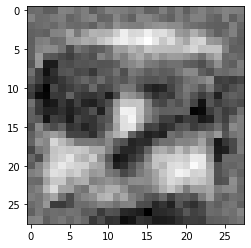

In [2]:
import matplotlib.pyplot as plt

# Get the weights of the model
weights = model.get_weights()

# Plot the weights as a 2D plot
plt.imshow(weights[0].reshape(28, 28), cmap='gray')
plt.show()

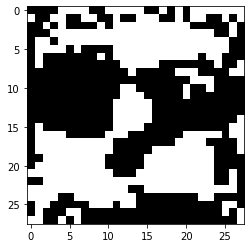

In [3]:
import numpy as np

# Plot the sign of the weights as a 2D plot
plt.imshow(np.sign(weights[0]).reshape(28, 28), cmap='gray')
plt.show()

In [4]:
def get_adversarial_exemple(model, dataset, eps):
  adversarial_examples = []
  for images, labels in dataset:
    with tf.GradientTape() as tape:
      tape.watch(images)
      predictions = model(images)      
      loss = tf.keras.losses.get(model.loss)(labels, predictions)
    gradient = tape.gradient(loss, images)
    signed_grad = tf.sign(gradient)
    adversarial_example = images + eps * signed_grad
    adversarial_example = tf.clip_by_value(adversarial_example, 0, 1)
    adversarial_examples.append(adversarial_example)
  adversarial_examples = np.concatenate(adversarial_examples,axis=0)
  return adversarial_examples

In [6]:
X_train_adv = get_adversarial_exemple(model, ds_train, eps=0.25)
X_train_adv = np.array(X_train_adv)
X_test_adv = get_adversarial_exemple(model, ds_test, eps=0.25)
X_test_adv = np.array(X_test_adv)

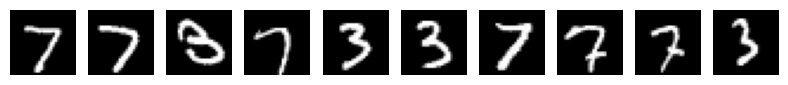

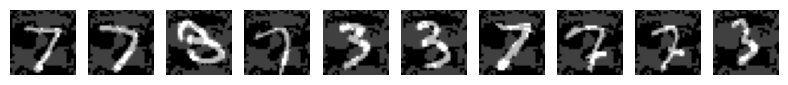

In [7]:
#Afficher les images
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 20), dpi=100)
plt.figure(1)
for i in range(10):
  plt.subplot(10,20,i+1)
  plt.imshow(x_test[i,:].reshape([28,28]), cmap='gray')
  plt.axis('off')
plt.figure(figsize=(20, 20), dpi=100)
plt.figure(2)
for i in range(10):
  plt.subplot(10,20,i+1)
  plt.imshow(X_test_adv[i,:].reshape([28,28]), cmap='gray')
  plt.axis('off')
plt.show()